In [6]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer
from transformers import RobertaTokenizer
from transformers import RobertaTokenizerFast

%matplotlib inline

In [7]:
train = pd.read_csv('../input/tweet-sentiment-extraction/train_folds.csv')
train['type'] = 'normal'

In [8]:
train.head()

,textID,text,selected_text,sentiment,kfold,type
0,f7fdea625a,i`m so bored i can barely even tweet. i have n...,bored,negative,0,normal
1,c19de2c75b,awwwwwwwwww thats jus...awwwww.did she get t...,awwwwwwwwww thats jus...awwwww.did she get to...,neutral,0,normal
2,0f963af18f,I did not twitt yesterday cause it was a very ...,I can not sleep,negative,0,normal
3,0583c78cc1,Congratulation`s to phil packer on completing ...,Congratulation`s,positive,0,normal
4,1cdb444ea5,O`Charleys? Pretty good. Especially when its f...,Pretty good.,positive,0,normal


In [9]:
sub = pd.read_csv('../src/submission.csv')
test = pd.read_csv('../input/tweet-sentiment-extraction/test.csv')
test = test.merge(sub, on='textID', how='left')
test['type'] = 'pseudo'

In [10]:
test.head()

,textID,text,sentiment,selected_text,score,type
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,last session of the day http://twitpic.com/67ezh,1.379625,pseudo
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,exciting,1.071571,pseudo
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,such a shame!,1.162312,pseudo
3,01082688c6,happy bday!,positive,happy,1.394409,pseudo
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,i like it!!,1.043010,pseudo


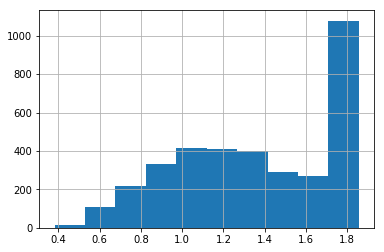

In [11]:
test['score'].hist()

In [14]:
test = test[test['score']>1]
test.reset_index(drop=True, inplace=True)

In [15]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)
test['kfold'] = 0
for fold, (train_idx, valid_idx) in enumerate(kf.split(test, test['sentiment'])):
    test.loc[valid_idx, 'kfold'] = fold

In [16]:
test.head()

,textID,text,sentiment,selected_text,score,type,kfold
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,last session of the day http://twitpic.com/67ezh,1.379625,pseudo,0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,exciting,1.071571,pseudo,0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,such a shame!,1.162312,pseudo,3
3,01082688c6,happy bday!,positive,happy,1.394409,pseudo,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,i like it!!,1.043010,pseudo,0


In [17]:
train = pd.concat([train, test], ignore_index=True, sort=False)
train.reset_index(drop=True, inplace=True)

In [19]:
train.shape

(30271, 7)

In [20]:
test.shape

(2791, 7)

In [18]:
train.to_csv('../input/tweet-sentiment-extraction/pseudo.csv')

In [43]:
# local_test.to_pickle('../input/localtest_roberta2.pkl')